# Unsupervised Learninfg
To put it simply, supervised learning uses labeled input and output data, while an unsupervised learning algorithm does not. In supervised learning, the algorithm “learns” from the training dataset by iteratively making predictions on the data and adjusting for the correct answer
## clustering
### K means clustering

In [81]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt


In [82]:
#importing the data set

In [83]:
data = pd.read_csv(r'C:\Users\TMR\Desktop\DataScience\DataSets\movie_metadata.csv')
print(data.shape)
print(data.head)

(5043, 28)
<bound method NDFrame.head of       color      director_name  num_critic_for_reviews  duration  \
0     Color      James Cameron                   723.0     178.0   
1     Color     Gore Verbinski                   302.0     169.0   
2     Color         Sam Mendes                   602.0     148.0   
3     Color  Christopher Nolan                   813.0     164.0   
4       NaN        Doug Walker                     NaN       NaN   
...     ...                ...                     ...       ...   
5038  Color        Scott Smith                     1.0      87.0   
5039  Color                NaN                    43.0      43.0   
5040  Color   Benjamin Roberds                    13.0      76.0   
5041  Color        Daniel Hsia                    14.0     100.0   
5042  Color           Jon Gunn                    43.0      90.0   

      director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                         0.0                   855.0  Joel David M

In [84]:
data['director_facebook_likes']

0           0.0
1         563.0
2           0.0
3       22000.0
4         131.0
         ...   
5038        2.0
5039        NaN
5040        0.0
5041        0.0
5042       16.0
Name: director_facebook_likes, Length: 5043, dtype: float64

In [85]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [86]:
newdata = data.iloc[:, 4 :6]
newdata

,director_facebook_likes,actor_3_facebook_likes
0,0.0,855.0
1,563.0,1000.0
2,0.0,161.0
3,22000.0,23000.0
4,131.0,NaN
...,...,...
5038,2.0,318.0
5039,NaN,319.0
5040,0.0,0.0
5041,0.0,489.0


<AxesSubplot:>

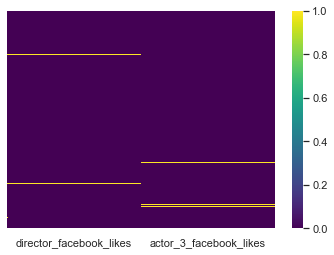

In [87]:
sns.heatmap(newdata.isnull(), yticklabels=False,cmap='viridis')

In [88]:
newdata.dropna(inplace=True)

<AxesSubplot:>

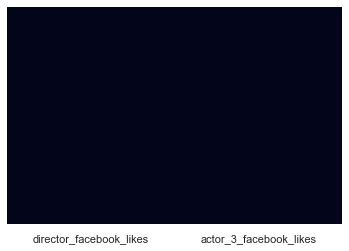

In [89]:
sns.heatmap(newdata.isnull(), yticklabels=False,cbar=False)

In [90]:
#using the KMeans from sklearn
from sklearn.cluster import KMeans


In [91]:
kmeans = KMeans(n_clusters=5)#clusters = 5 # depends on SSE method --elbow method

In [92]:
kmeans.fit(newdata)

KMeans(n_clusters=5)

In [93]:
# find clusters centers
kmeans.cluster_centers_ 

array([[  153.94452806,   424.19264674],
       [12490.38461538,   605.93269231],
       [  210.77011494, 11126.43678161],
       [17545.45454545, 14545.45454545],
       [17621.21212121,   596.10606061]])

In [94]:
print(kmeans.labels_)
print(len(kmeans.cluster_centers_))

[0 0 0 ... 0 0 0]
5


In [95]:
print(type(kmeans.labels_))
unique, counts = np.unique(kmeans.labels_,return_counts= True)
print(dict(zip(unique, counts)))

<class 'numpy.ndarray'>
{0: 4651, 1: 104, 2: 87, 3: 11, 4: 66}


C:\Users\TMR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\TMR\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


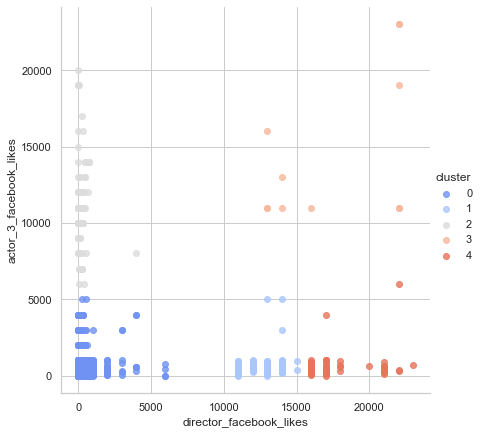

In [96]:
#plot the data
newdata['cluster']=kmeans.labels_
sns.set_style('whitegrid')
#sns.regplot(x=director_facebook_likes, y=actor_3_facebook_likes)
sns.lmplot('director_facebook_likes','actor_3_facebook_likes',data=newdata,hue='cluster',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)